# 1. Required dependencies: 

Outside of standard libraries in Python 3.7.0, the following libraries are required:

* Qiskit 0.20.0
* NumPy
* pylatexenc

In [ ]:
pip install qiskit -q


     |████████████████████████████████| 8.3MB 2.9MB/s 
     |████████████████████████████████| 16.5MB 250kB/s 
     |████████████████████████████████| 174kB 39.7MB/s 
     |████████████████████████████████| 174kB 50.2MB/s 
     |████████████████████████████████| 1.9MB 47.0MB/s 
     |████████████████████████████████| 5.8MB 44.1MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 1.1MB 44.6MB/s 
     |████████████████████████████████| 296kB 50.6MB/s 
     |████████████████████████████████| 71kB 7.8MB/s 
     |████████████████████████████████| 583kB 45.5MB/s 
     |████████████████████████████████| 102kB 10.0MB/s 
     |████████████████████████████████| 2.6MB 49.1MB/s 


In [ ]:
pip install pylatexenc -q


     |████████████████████████████████| 163kB 2.8MB/s 


In [ ]:
from qiskit import *
import matplotlib
import numpy as np

from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_state_qsphere

%matplotlib inline


# 2. Target output

The desired output of the optimized circuit is an equal probability of the computational basis measurements 01 and 10, or the statevector $|\Psi^+\rangle = \frac{|01\rangle + |10\rangle}{\sqrt{2}}$ prior to measurement. This state is the inverse of the more famous Bell state $|\Phi^+\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}$, which is typically formed by a Hadamard and CNOT gate.



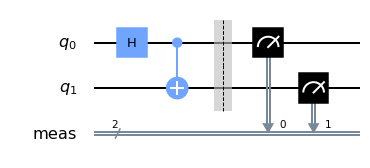

In [ ]:
# Initialize Bell state circuit

circ_phi_plus = QuantumCircuit(2)
circ_phi_plus.h(0)
circ_phi_plus.cx(0,1)
circ_phi_plus.measure_all()

circ_phi_plus.draw(output='mpl')

The state $|\Psi^+\rangle$ can be achieved by placing an X gate on the target qubit ahead of the CNOT, as shown in the circuit below.

Note that this information is provided for purposes of logic comparison only. The high-level circuit used to achieve $|\Psi^+\rangle$ assumes an initial state of $|00\rangle$, and thus is trivial in cases where the inital state is random.

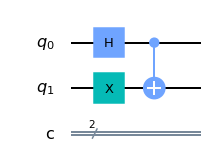

In [ ]:
# Initialize Bell state circuit for statevector observation

circ_psi_plus = QuantumCircuit(2,2)
circ_psi_plus.x(1)
circ_psi_plus.h(0)
circ_psi_plus.cx(0,1)

circ_psi_plus.draw(output='mpl')

Statevector:  [0.        +0.j 0.70710678+0.j 0.70710678+0.j 0.        +0.j] 



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


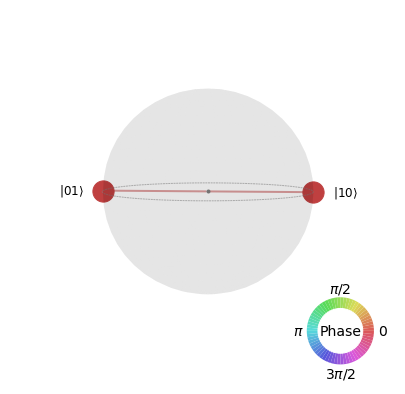

In [ ]:
# Statevector output of Bell state circuit

backend_state = Aer.get_backend('statevector_simulator')
result = execute(circ_psi_plus,backend_state).result().get_statevector()
print("Statevector: ", result, "\n")

state = Statevector.from_instruction(circ_psi_plus)
plot_state_qsphere(state)

{'01': 1} 

{'01': 3, '10': 7} 

{'01': 47, '10': 53} 

{'01': 478, '10': 522} 



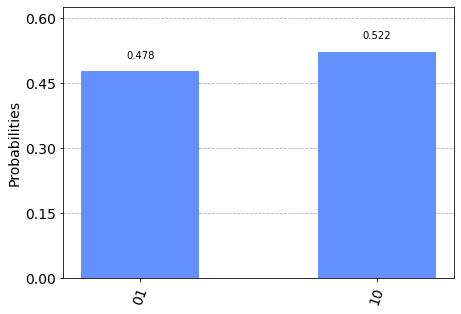

In [ ]:
# Prepare simulation on qasm_simulator backend

# Add measurements to end of circuit
circ_psi_plus.measure([0,1],[0,1])

# Initialize measurement arrays
num_meas = [1, 10, 100, 1000]
counts_psi_plus = [0,0,0,0]

# Select qasm_simulator backend, a noisy quantum circuit simulator when used with density matrix method
backend_meas = Aer.get_backend('qasm_simulator')
backend_options = {"method": "density_matrix"}

# Number of measurements varied on each execution
for i in range(4):
  job_meas = execute(circ_psi_plus, backend_meas, shots = num_meas[i], backend_properties=backend_options)
  result_meas  = job_meas.result()
  counts_psi_plus[i] = result_meas.get_counts()
  print(counts_psi_plus[i], "\n")

plot_histogram(counts_psi_plus[3])
#subplot??

# 3. Circuit Optimization with Known Initial State

In the code blocks below, the circuit architecture to be optimized is drawn, setting all initial rotation angles to 0. Note that because the circuit is built and simulated in Qiskit, a default inital state of $|00\rangle$  is assumed when not specified otherwise.

The purpose of examining the output in this situation is to validate the optimization algorithm and demonstrate that the architecture is acceptable



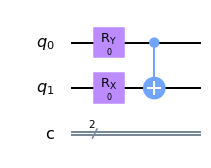

In [ ]:
# Initialize gate parameters at 0

theta_x_1 = 0
theta_y_0 = 0

# Initialize circuit for optimization, allowing default state |00>

circ = QuantumCircuit(2,2)

circ.ry(theta_y_0,0)
circ.rx(theta_x_1, 1)
circ.cx(0,1)

circ.draw(output='mpl')

This circuit is constructed to create an entanglement such that the computational basis measurements 01 and 10 are at equal probabilities. An X rotation gate is provided on the target qubit ``` q_1 ``` in order to provide the required qubit flip to $|1\rangle$ once optimized. Additionally, a Y rotation gate on ``` q_0 ``` will be used to form the desired superposition.

Initial Statevector:  [1.+0.j 0.+0.j 0.+0.j 0.+0.j] 



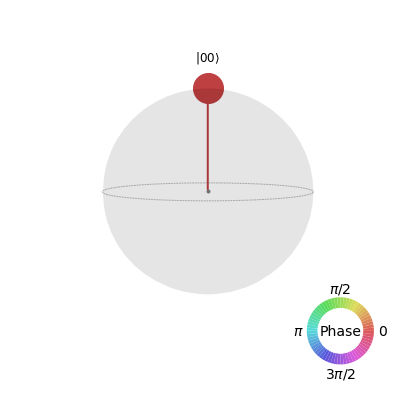

In [ ]:
# Initial statevector output of unoptimized circuit
backend_state = Aer.get_backend('statevector_simulator')
result = execute(circ,backend_state).result().get_statevector()
print("Initial Statevector: ", result, "\n")

state = Statevector.from_instruction(circ)
plot_state_qsphere(state)

In [ ]:
#ACTION ITEM: Gradient descent of each param. Key words include cost function, learning rate. 
#Constrain by desired amplitude (0.5), computational basis (01, 10), phase (0, or concede -pi/2)
#Investigate whether RY angle on q0 can change the statevector phases if time allows

In [ ]:
#REMOVE BEFORE SUBMIT
#circ.measure([0,1],[0,1])
#circ.draw()
#Moral: redraw entire circuit after gradient descent, including gate redefinition

In [ ]:
#REMOVE BEFORE SUBMIT
#circ.measure_all()
#circ.draw()
#Unexpected result - extra classical rail called meas. Was this an oversight on designing measure_all?? Worth an issue on terra??

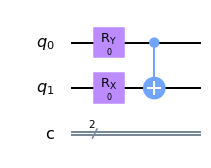

In [ ]:
# Reprint optimized circuit with default state |00>

circ = QuantumCircuit(2,2)

circ.ry(theta_y_0,0)
circ.rx(theta_x_1, 1)
circ.cx(0,1)

circ.draw(output='mpl')

Initial Statevector:  [1.+0.j 0.+0.j 0.+0.j 0.+0.j] 



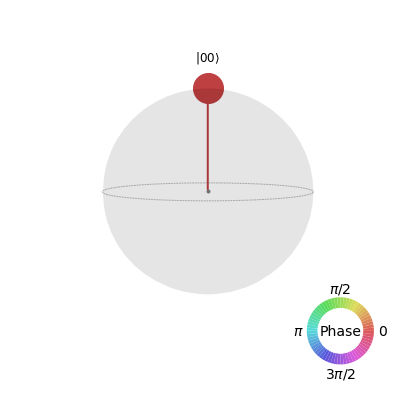

In [ ]:
# Statevector output after circuit optimization
backend_state = Aer.get_backend('statevector_simulator')
result = execute(circ,backend_state).result().get_statevector()
print("Optimized Statevector: ", result, "\n")

state = Statevector.from_instruction(circ)
plot_state_qsphere(state)

{'10': 1} 

{'01': 4, '10': 6} 

{'01': 44, '10': 56} 

{'01': 505, '10': 495} 



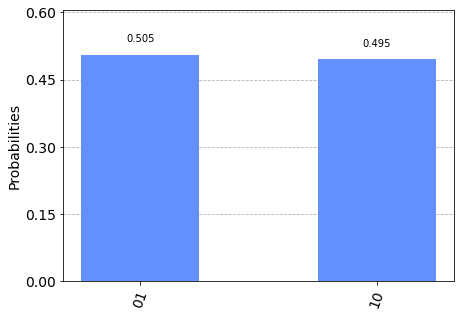

In [ ]:
# Prepare simulation on qasm_simulator backend

# Add measurements to optimized circuit
circ.measure([0,1],[0,1])

# Reset counts matrix
counts_meas = [0,0,0,0]

# Again, use qasm_simulator backend with density_matrix method
backend_meas = Aer.get_backend('qasm_simulator')
backend_options = {"method": "density_matrix"}

for i in range(4):
  job_meas = execute(circ, backend_meas, shots = num_meas[i], backend_properties=backend_options)
  result_meas  = job_meas.result()
  counts_meas[i] = result_meas.get_counts()
  print(counts_meas[i], "\n")

plot_histogram(counts_meas[3])
#subplot??


# 4. Circuit Optimization with Random Initial State



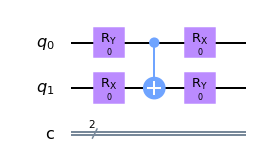

In [ ]:
# Initialize gate parameters at 0

theta_x_0 = 0
theta_x_1 = 0
theta_y_0 = 0
theta_y_1 = 0

# Initialize circuit for optimization with random initial state


circ2 = QuantumCircuit(2,2)

circ2.ry(theta_y_0,0)
circ2.rx(theta_x_1, 1)
circ2.cx(0,1)
circ2.rx(theta_x_0, 0)
circ2.ry(theta_y_1, 1)

circ2.draw(output='mpl')

Initial Statevector:  [1.+0.j 0.+0.j 0.+0.j 0.+0.j] 



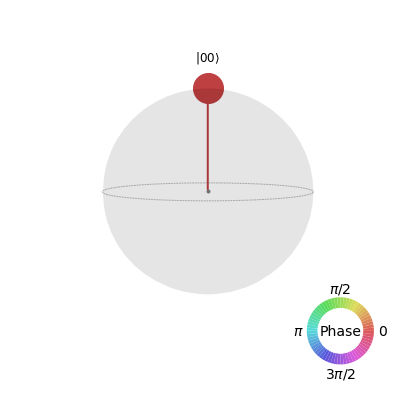

In [ ]:
# Statevector output after circuit optimization
backend_state = Aer.get_backend('statevector_simulator')
result = execute(circ2,backend_state).result().get_statevector()
print("Initial Statevector: ", result, "\n")

state = Statevector.from_instruction(circ2)
plot_state_qsphere(state)

In [ ]:
# VQE placeholder

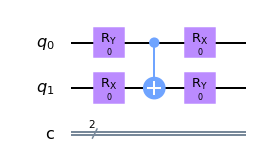

In [ ]:
# Redraw optimized circuit with random initial state??


circ2 = QuantumCircuit(2,2)

circ2.ry(theta_y_0,0)
circ2.rx(theta_x_1, 1)
circ2.cx(0,1)
circ2.rx(theta_x_0, 0)
circ2.ry(theta_y_1, 1)

circ2.draw(output='mpl')

Optimized Statevector:  [1.+0.j 0.+0.j 0.+0.j 0.+0.j] 



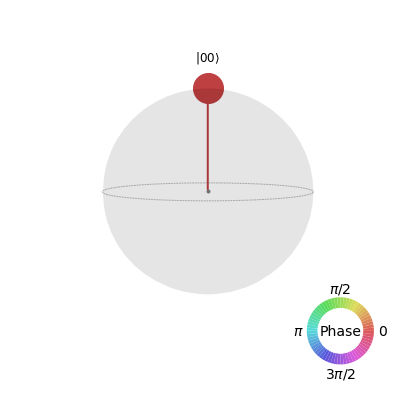

In [ ]:
# Statevector output after circuit optimization
backend_state = Aer.get_backend('statevector_simulator')
result = execute(circ2,backend_state).result().get_statevector()
print("Optimized Statevector: ", result, "\n")

state = Statevector.from_instruction(circ2)
plot_state_qsphere(state)

{'00': 1} 

{'00': 10} 

{'00': 100} 

{'00': 1000} 



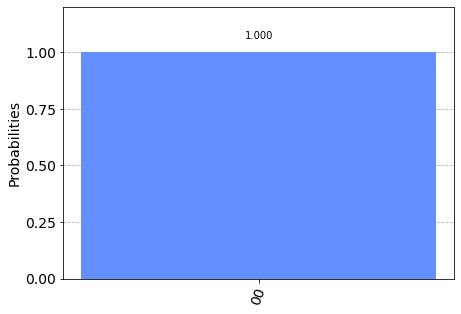

In [ ]:
# Prepare simulation on qasm_simulator backend - vary by number of measurements

circ2.measure([0,1],[0,1])

counts_meas = [0,0,0,0]

# Again, use qasm_simulator backend with density_matrix method
backend_meas = Aer.get_backend('qasm_simulator')
backend_options = {"method": "density_matrix"}

for i in range(4):
  job_meas = execute(circ2, backend_meas, shots = num_meas[i], backend_properties=backend_options)
  result_meas  = job_meas.result()
  counts_meas[i] = result_meas.get_counts()
  print(counts_meas[i], "\n")

plot_histogram(counts_meas[3])
#subplot??


# 5. Alternative circuit architecture?